In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("./blog.mplstyle")

field definitions: https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv

focus on consumption? energy "use"? 
- what share of the energy we use comes from renewables?

In [48]:
df = pd.read_csv("../data/owid-energy-data.csv")
df = df[df["year"] >= 1970]

In [49]:
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [50]:
us_df = df[df["country"] == "United States"]

In [51]:
us_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
20439,United States,1970,USA,200328336.0,4.912636e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20440,United States,1971,USA,202907920.0,5.065682e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20441,United States,1972,USA,205238384.0,5.334297e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20442,United States,1973,USA,207314768.0,5.637203e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20443,United States,1974,USA,209277968.0,5.621366e+12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


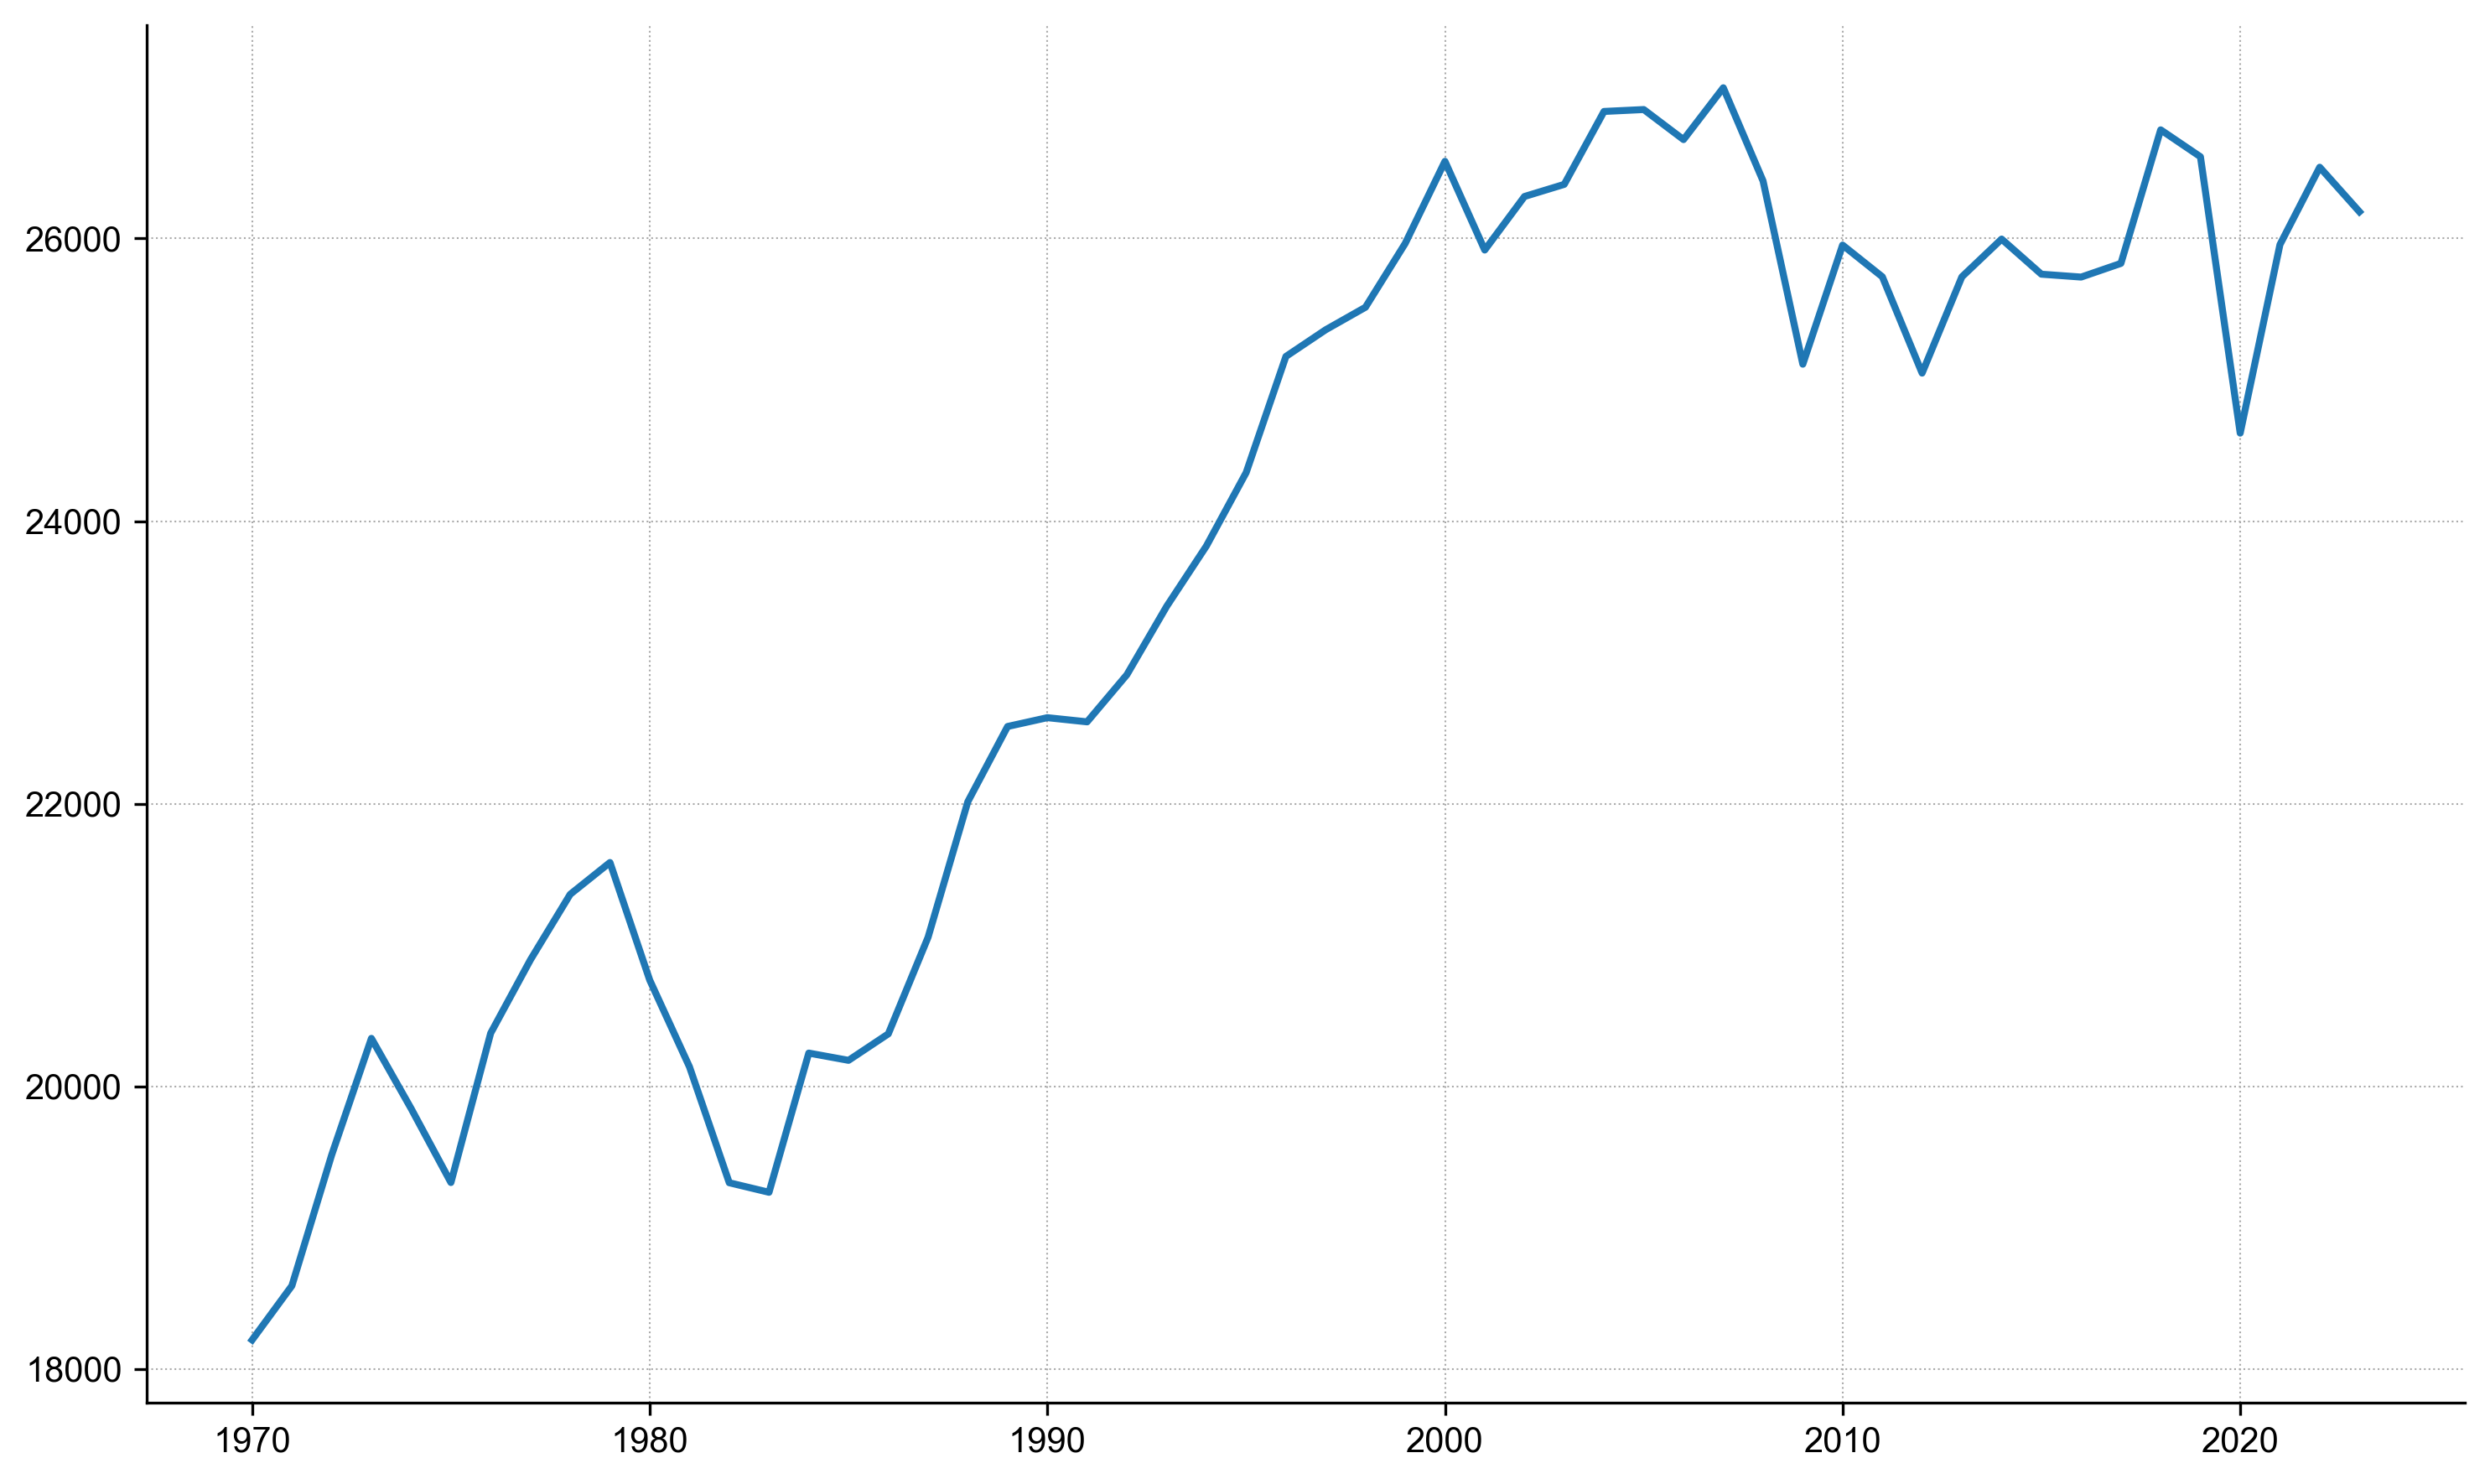

In [52]:
# plot year vs demand
plt.figure(figsize=(10, 6))
plt.plot(
    us_df["year"],
    us_df["primary_energy_consumption"],
    # label="Total Energy Demand",
    # color="blue",
    linewidth=2,
)
plt.show()

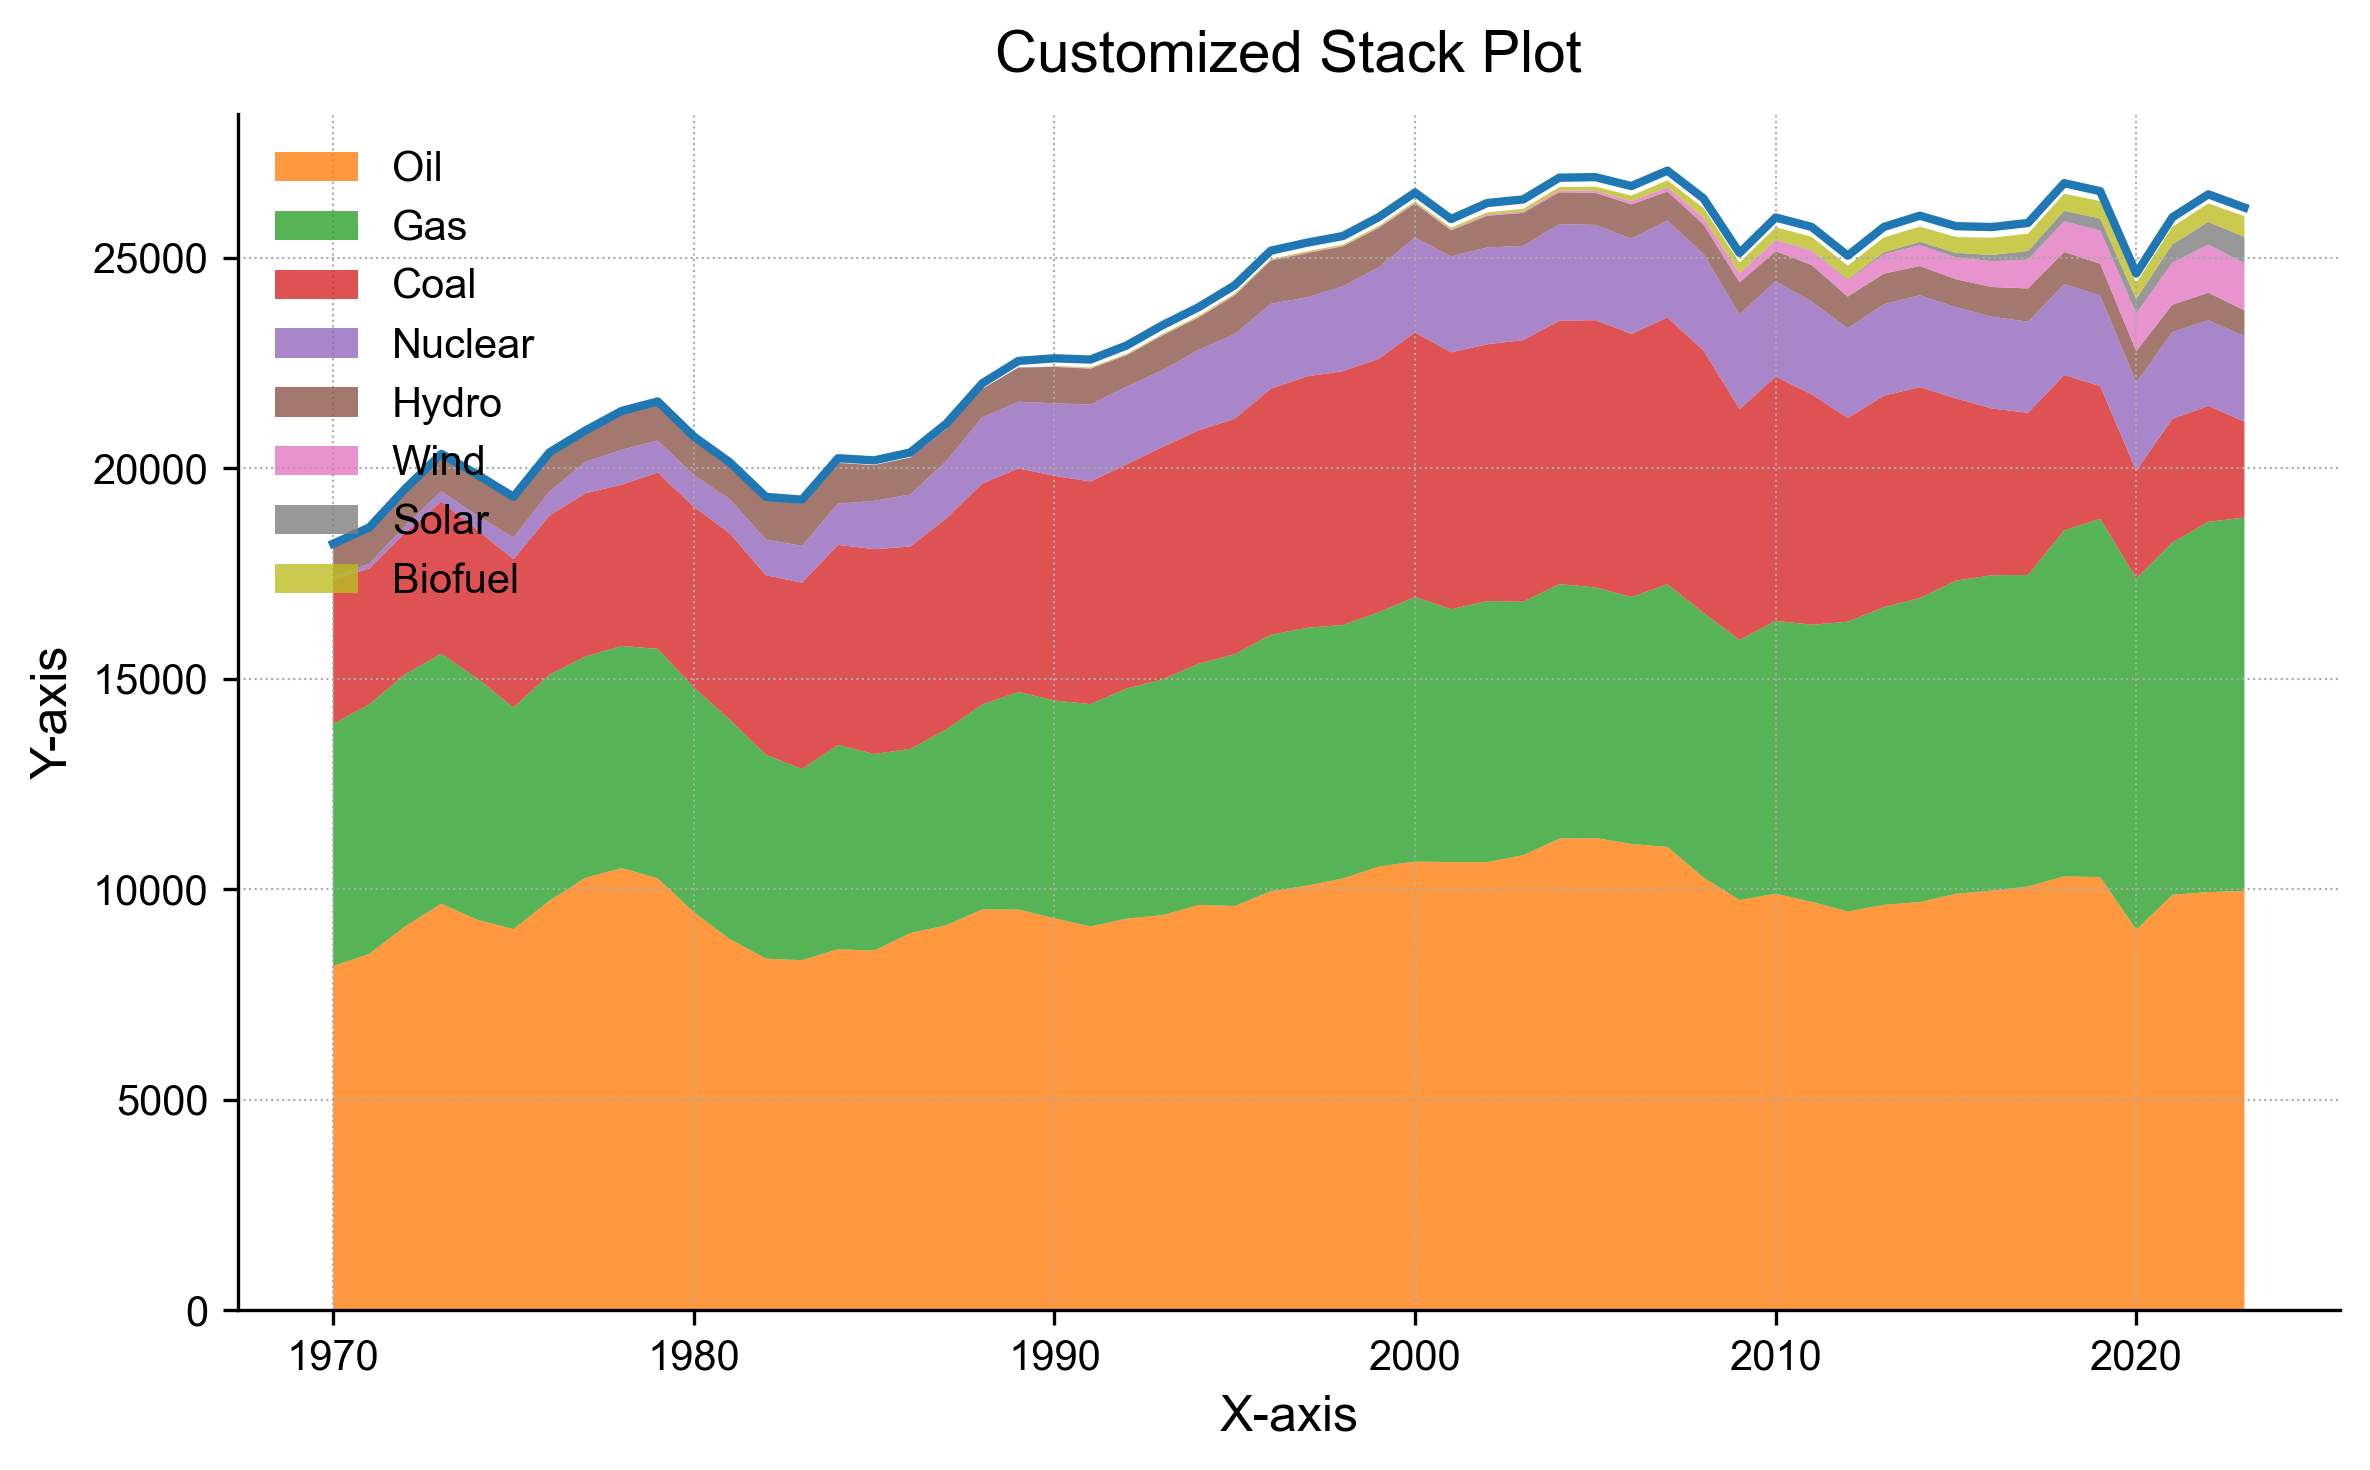

In [53]:
plt.plot(
    us_df["year"],
    us_df["primary_energy_consumption"],
    # label="Total Energy Demand",
    # color="blue",
    linewidth=2,
)
plt.stackplot(
    us_df["year"], 
    us_df["oil_consumption"],
    us_df["gas_consumption"],
    us_df["coal_consumption"],
    us_df["nuclear_consumption"],
    us_df["hydro_consumption"],
    us_df["wind_consumption"],
    us_df["solar_consumption"],
    us_df["biofuel_consumption"],
    labels=["Oil", "Gas", "Coal", "Nuclear", "Hydro", "Wind", "Solar", "Biofuel"], 
    # colors=['skyblue', 'lightcoral', 'lightgreen'], 
    alpha=0.8
)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Customized Stack Plot')
plt.legend(loc='upper left')
plt.show()

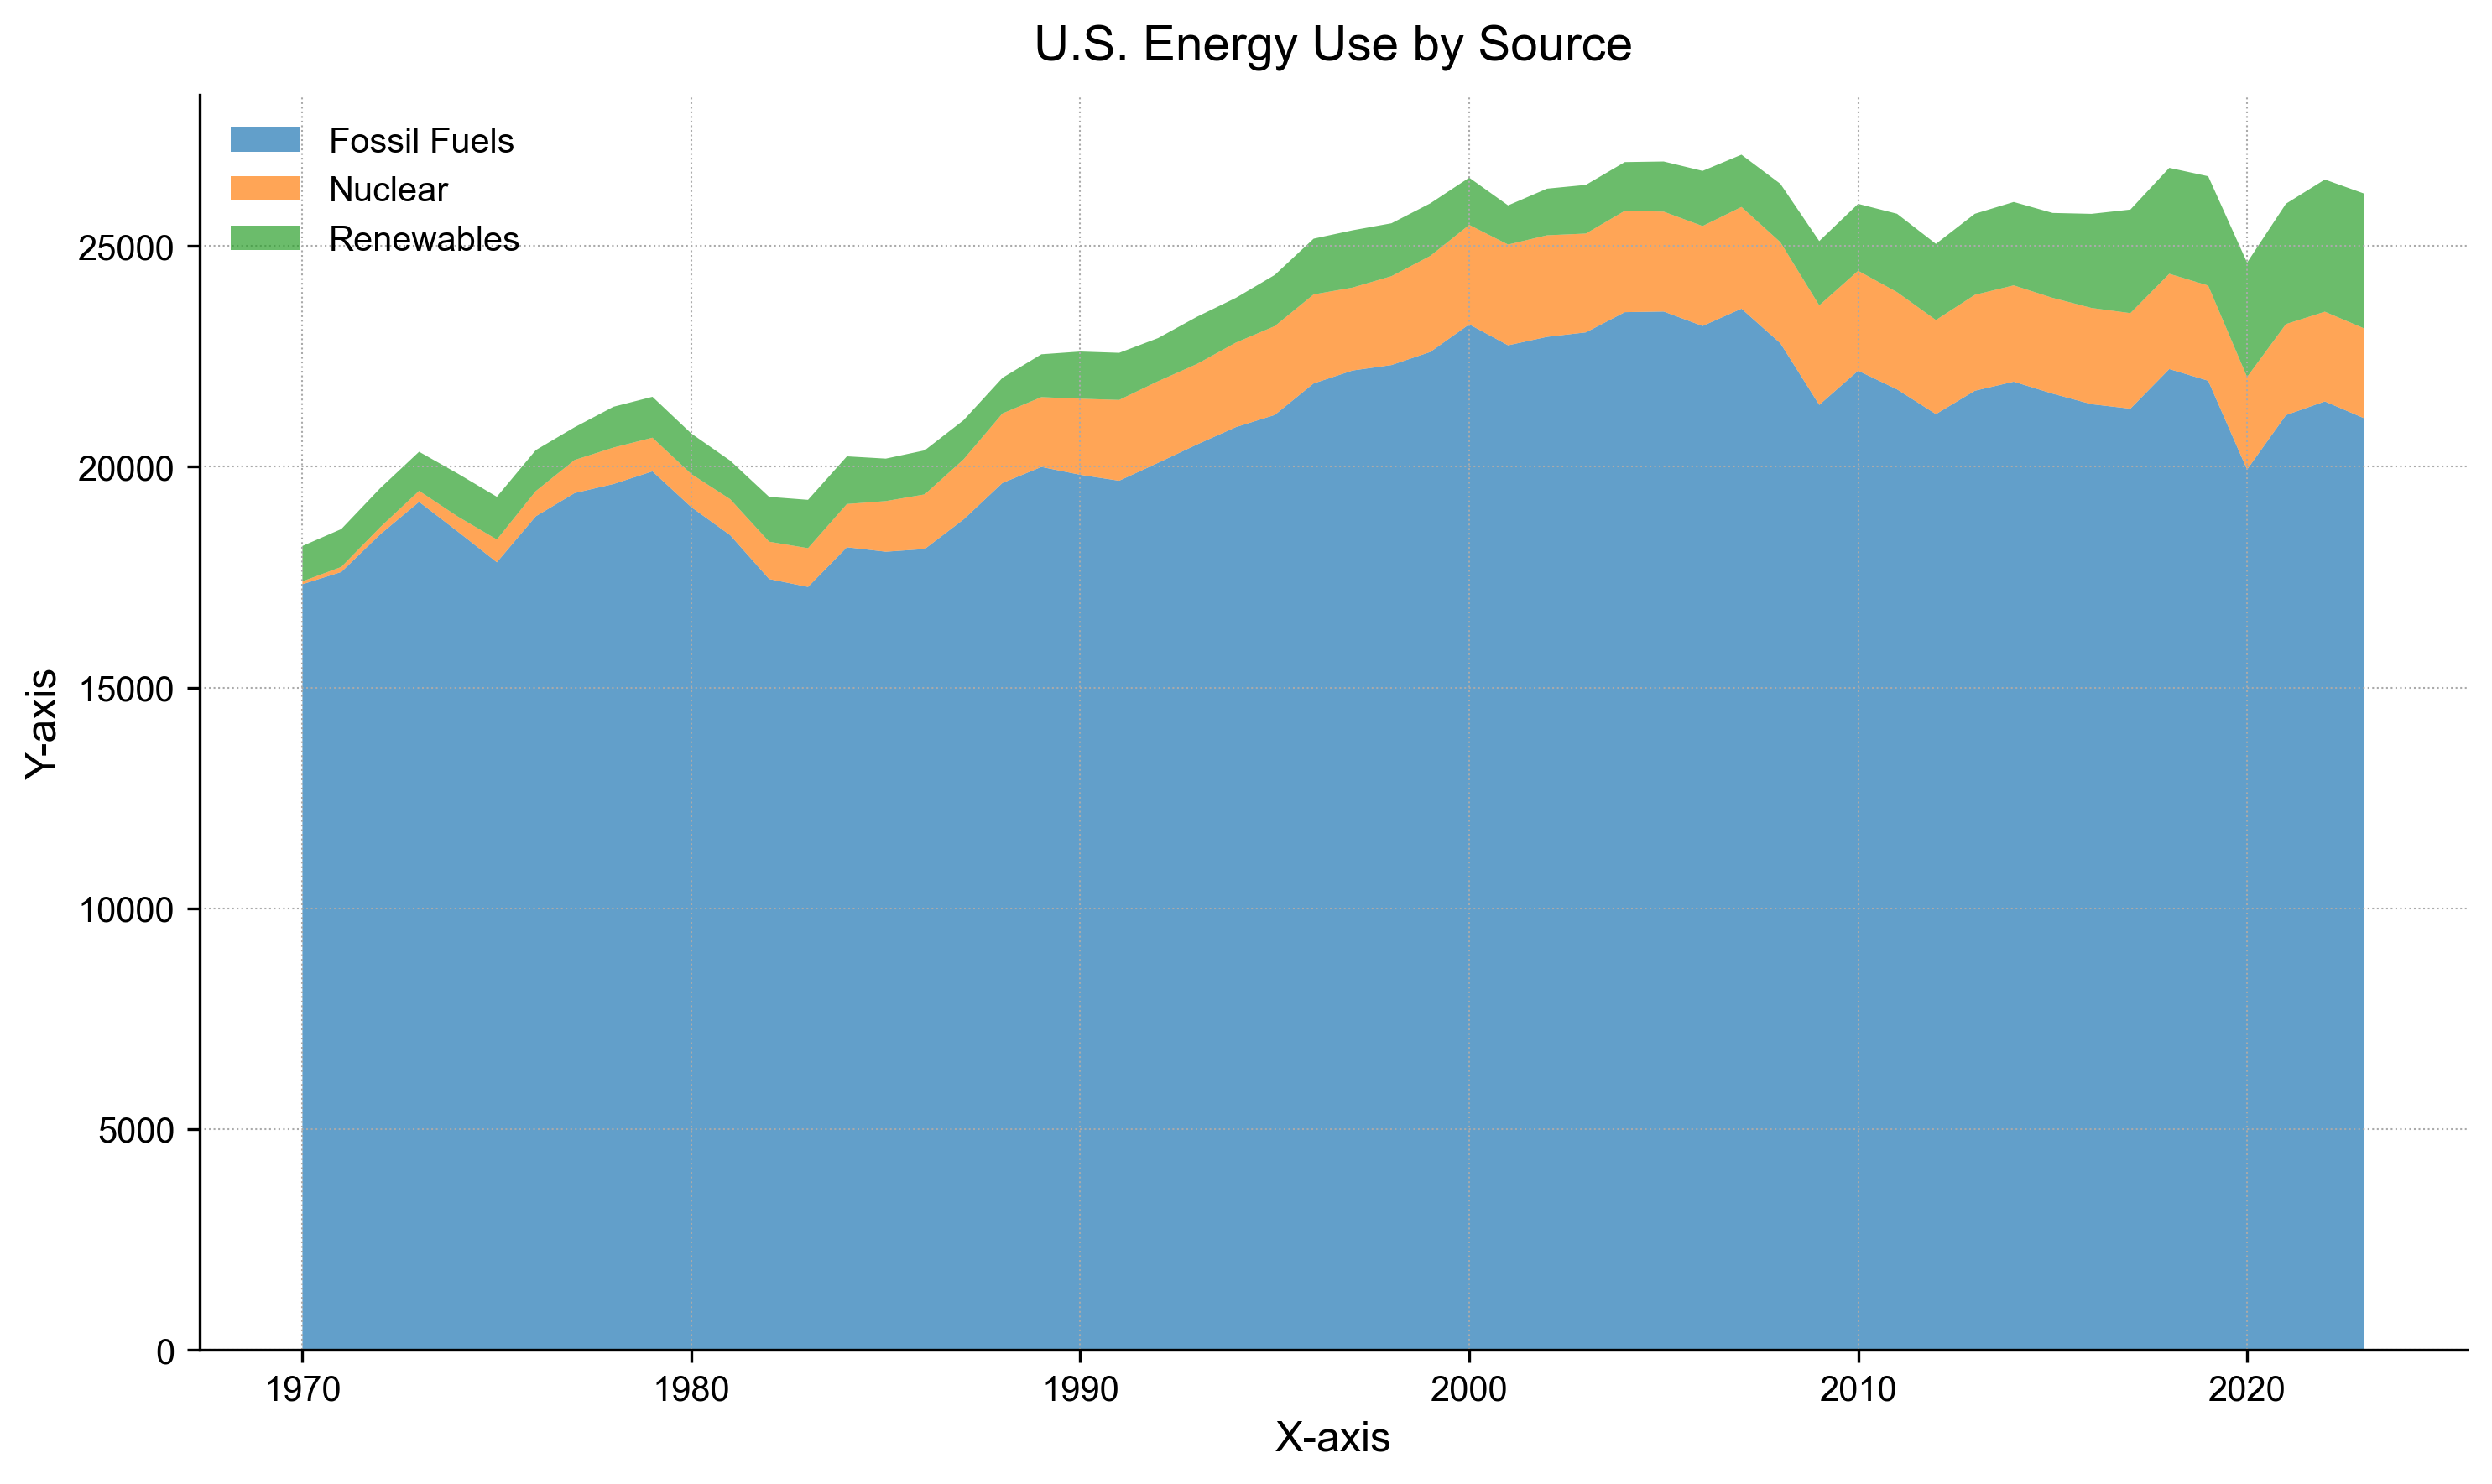

In [54]:
plt.figure(figsize=(10, 6))

# plt.plot(
#     us_df["year"],
#     us_df["primary_energy_consumption"],
#     # label="Total Energy Demand",
#     # color="blue",
#     linewidth=2,
# )
plt.stackplot(
    us_df["year"], 
    us_df["fossil_fuel_consumption"],
    us_df["nuclear_consumption"],
    us_df["renewables_consumption"],
    # us_df["coal_consumption"],
    labels=["Fossil Fuels", "Nuclear", "Renewables", "", ""], 
    # colors=['skyblue', 'lightcoral', 'lightgreen'], 
    alpha=0.7
)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("U.S. Energy Use by Source")
plt.legend(loc="upper left")
plt.show()

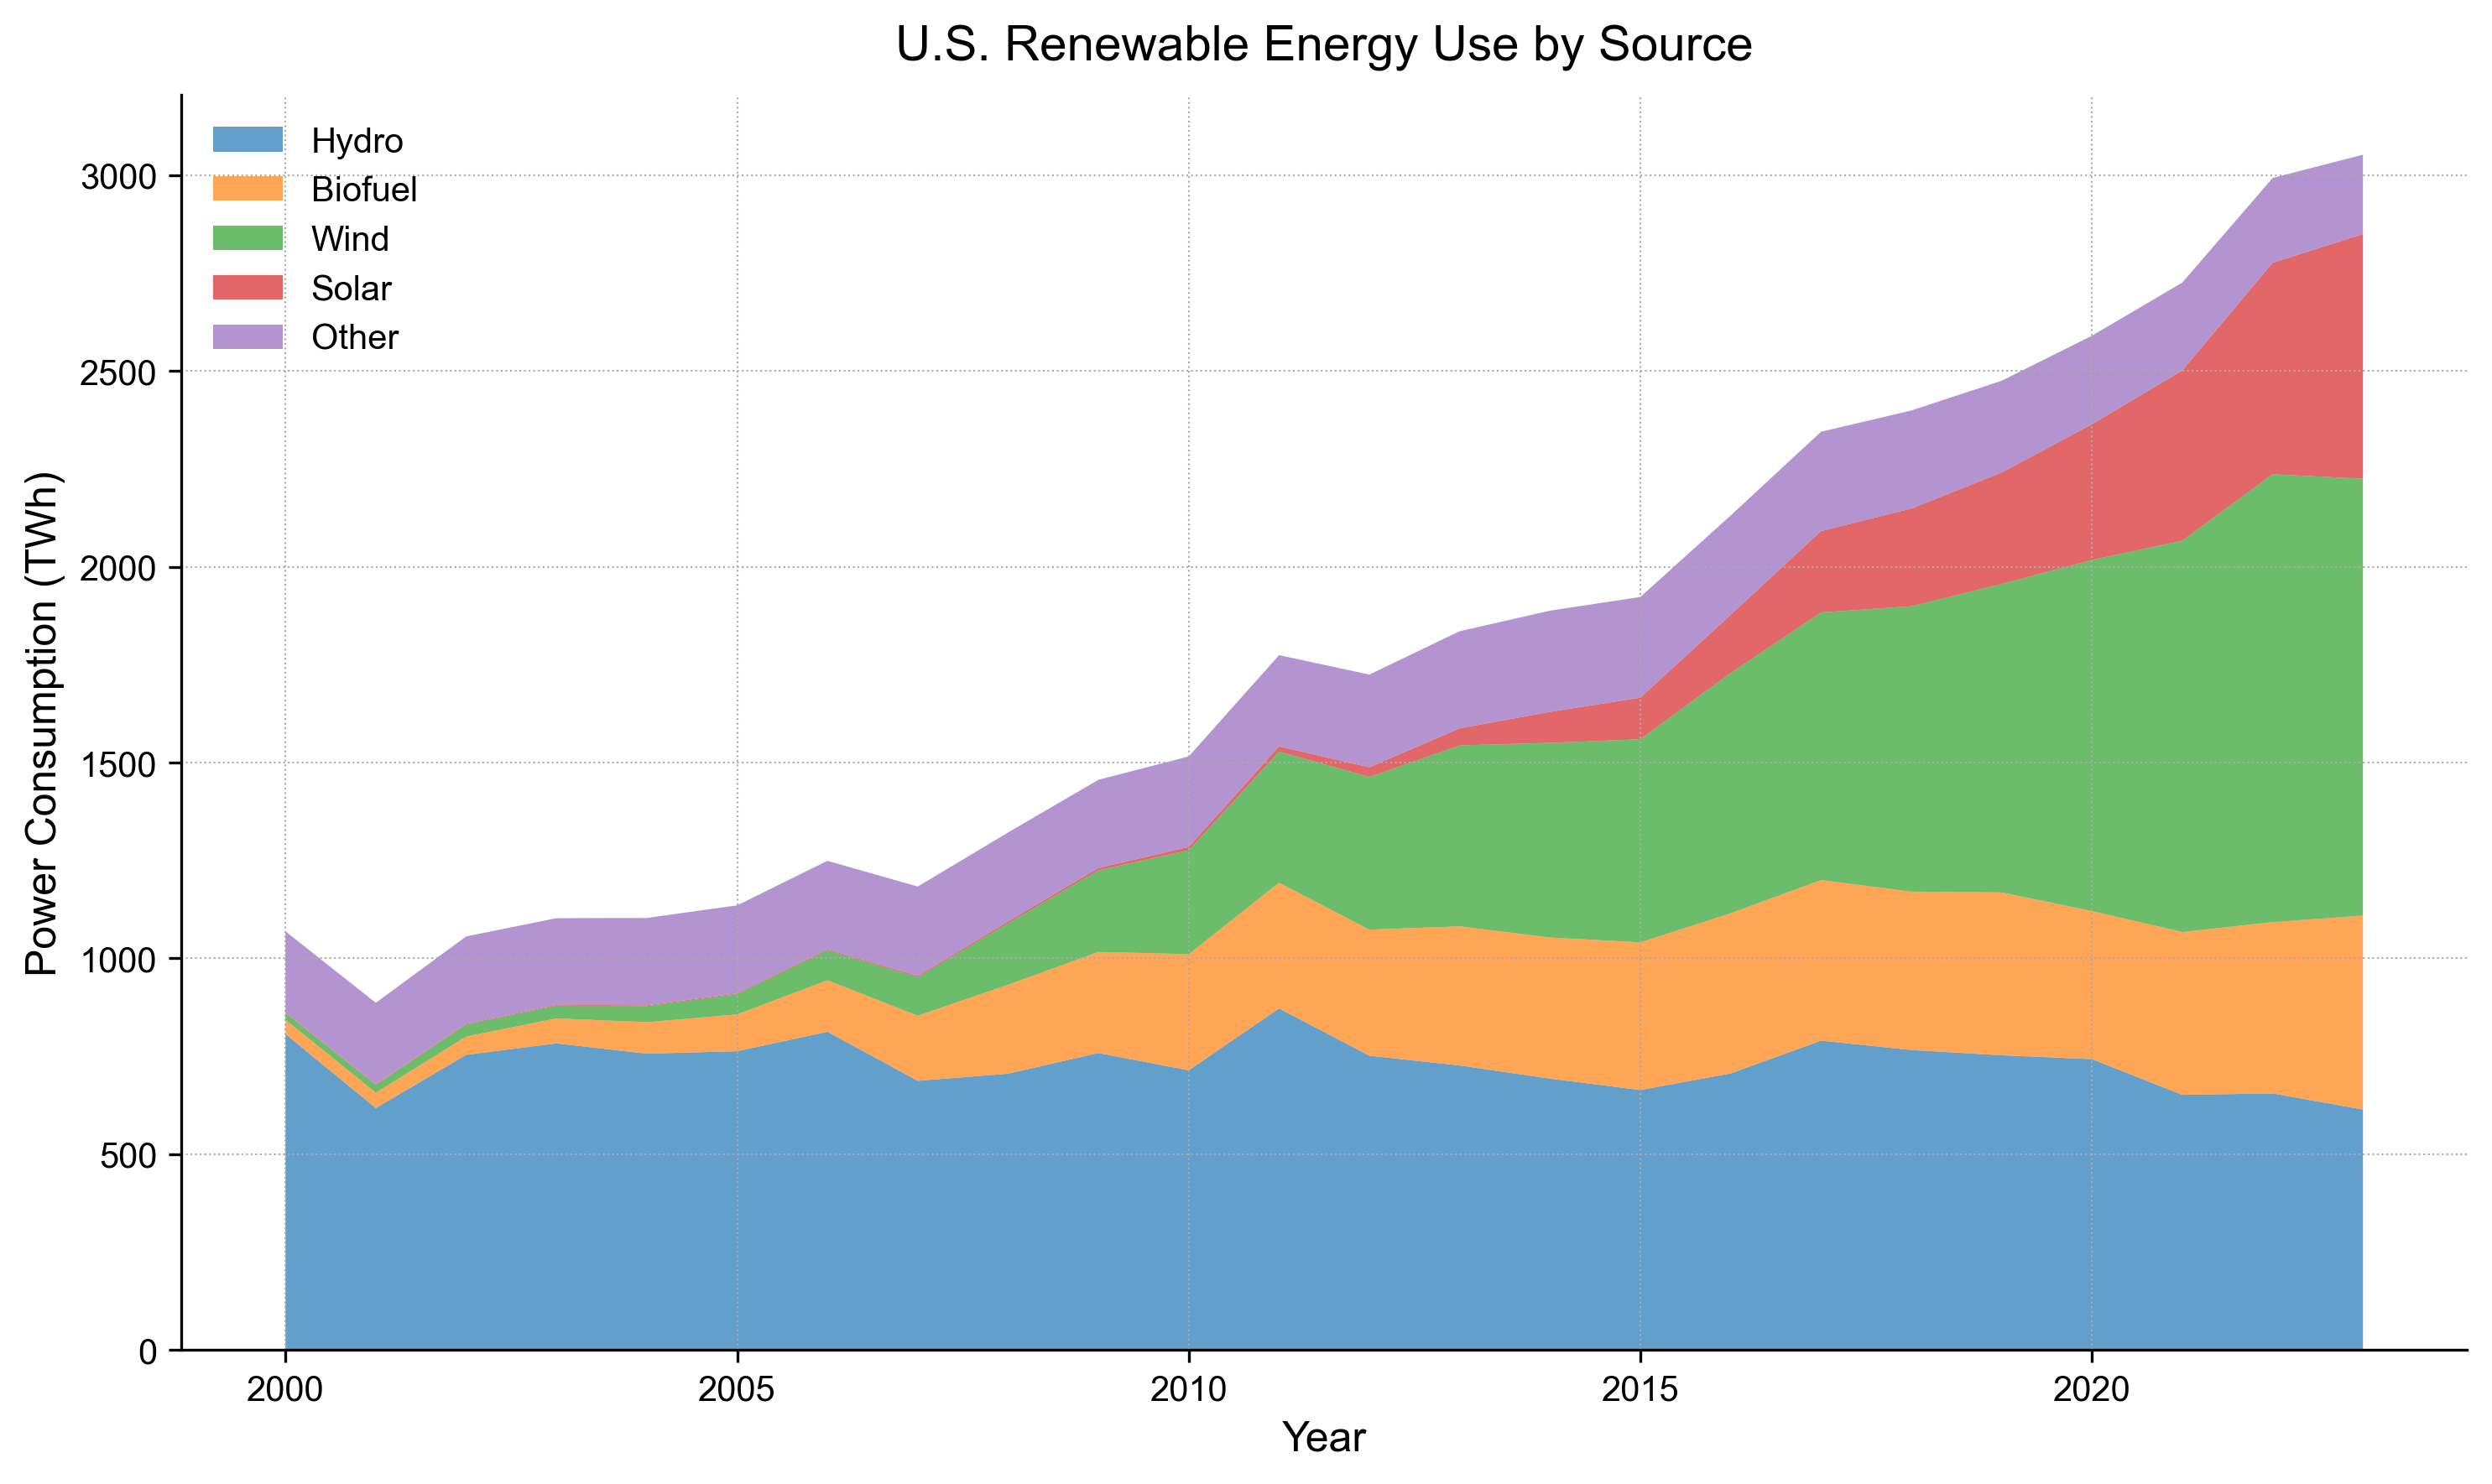

In [66]:
renewables_us_df = us_df[us_df["year"] >= 2000]

plt.figure(figsize=(10, 6))

# plt.plot(
#     renewables_us_df["year"],
#     renewables_us_df["renewables_consumption"],
#     # label="Total Energy Demand",
#     # color="blue",
#     linewidth=2,
# )
plt.stackplot(
    renewables_us_df["year"], 
    renewables_us_df["hydro_consumption"],
    renewables_us_df["biofuel_consumption"],
    renewables_us_df["wind_consumption"],
    renewables_us_df["solar_consumption"],
    renewables_us_df["other_renewable_consumption"],
    # us_df["coal_consumption"],
    labels=["Hydro", "Biofuel", "Wind", "Solar", "Other"], 
    # colors=['skyblue', 'lightcoral', 'lightgreen'], 
    alpha=0.7
)
plt.xlabel("Year")
plt.ylabel("Power Consumption (TWh)")
plt.title("U.S. Renewable Energy Use by Source")
plt.legend(loc="upper left")
plt.show()

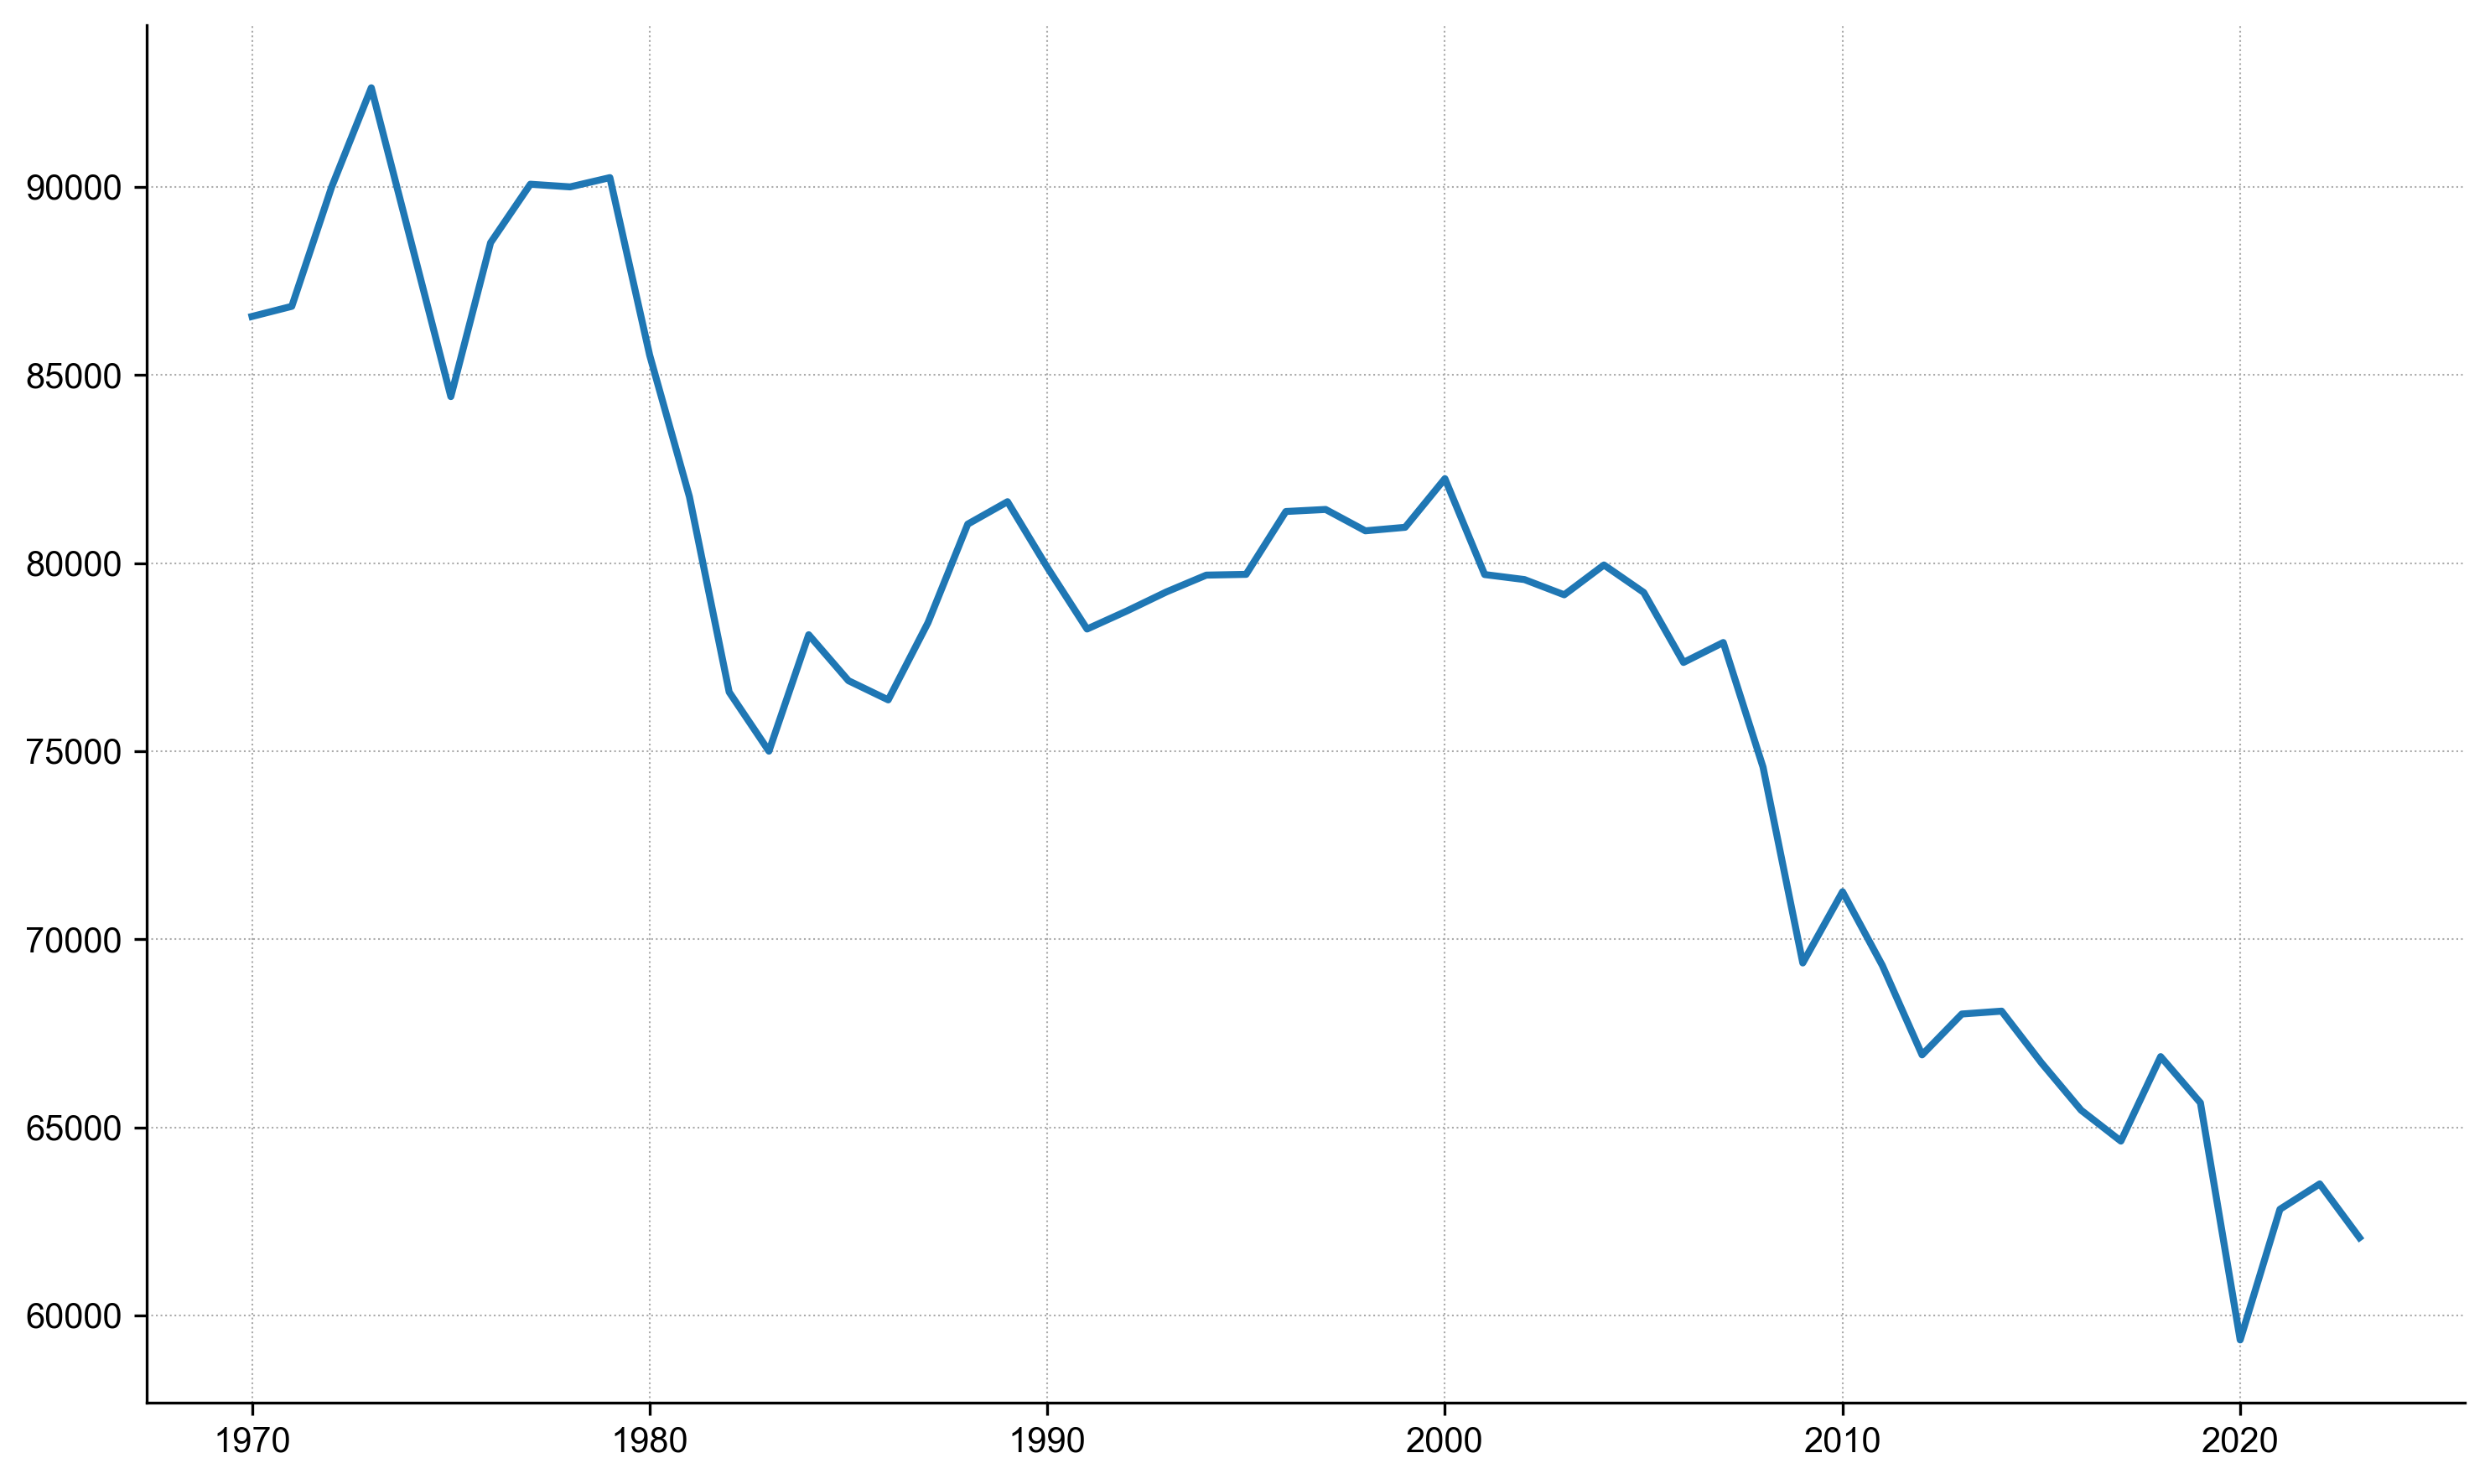

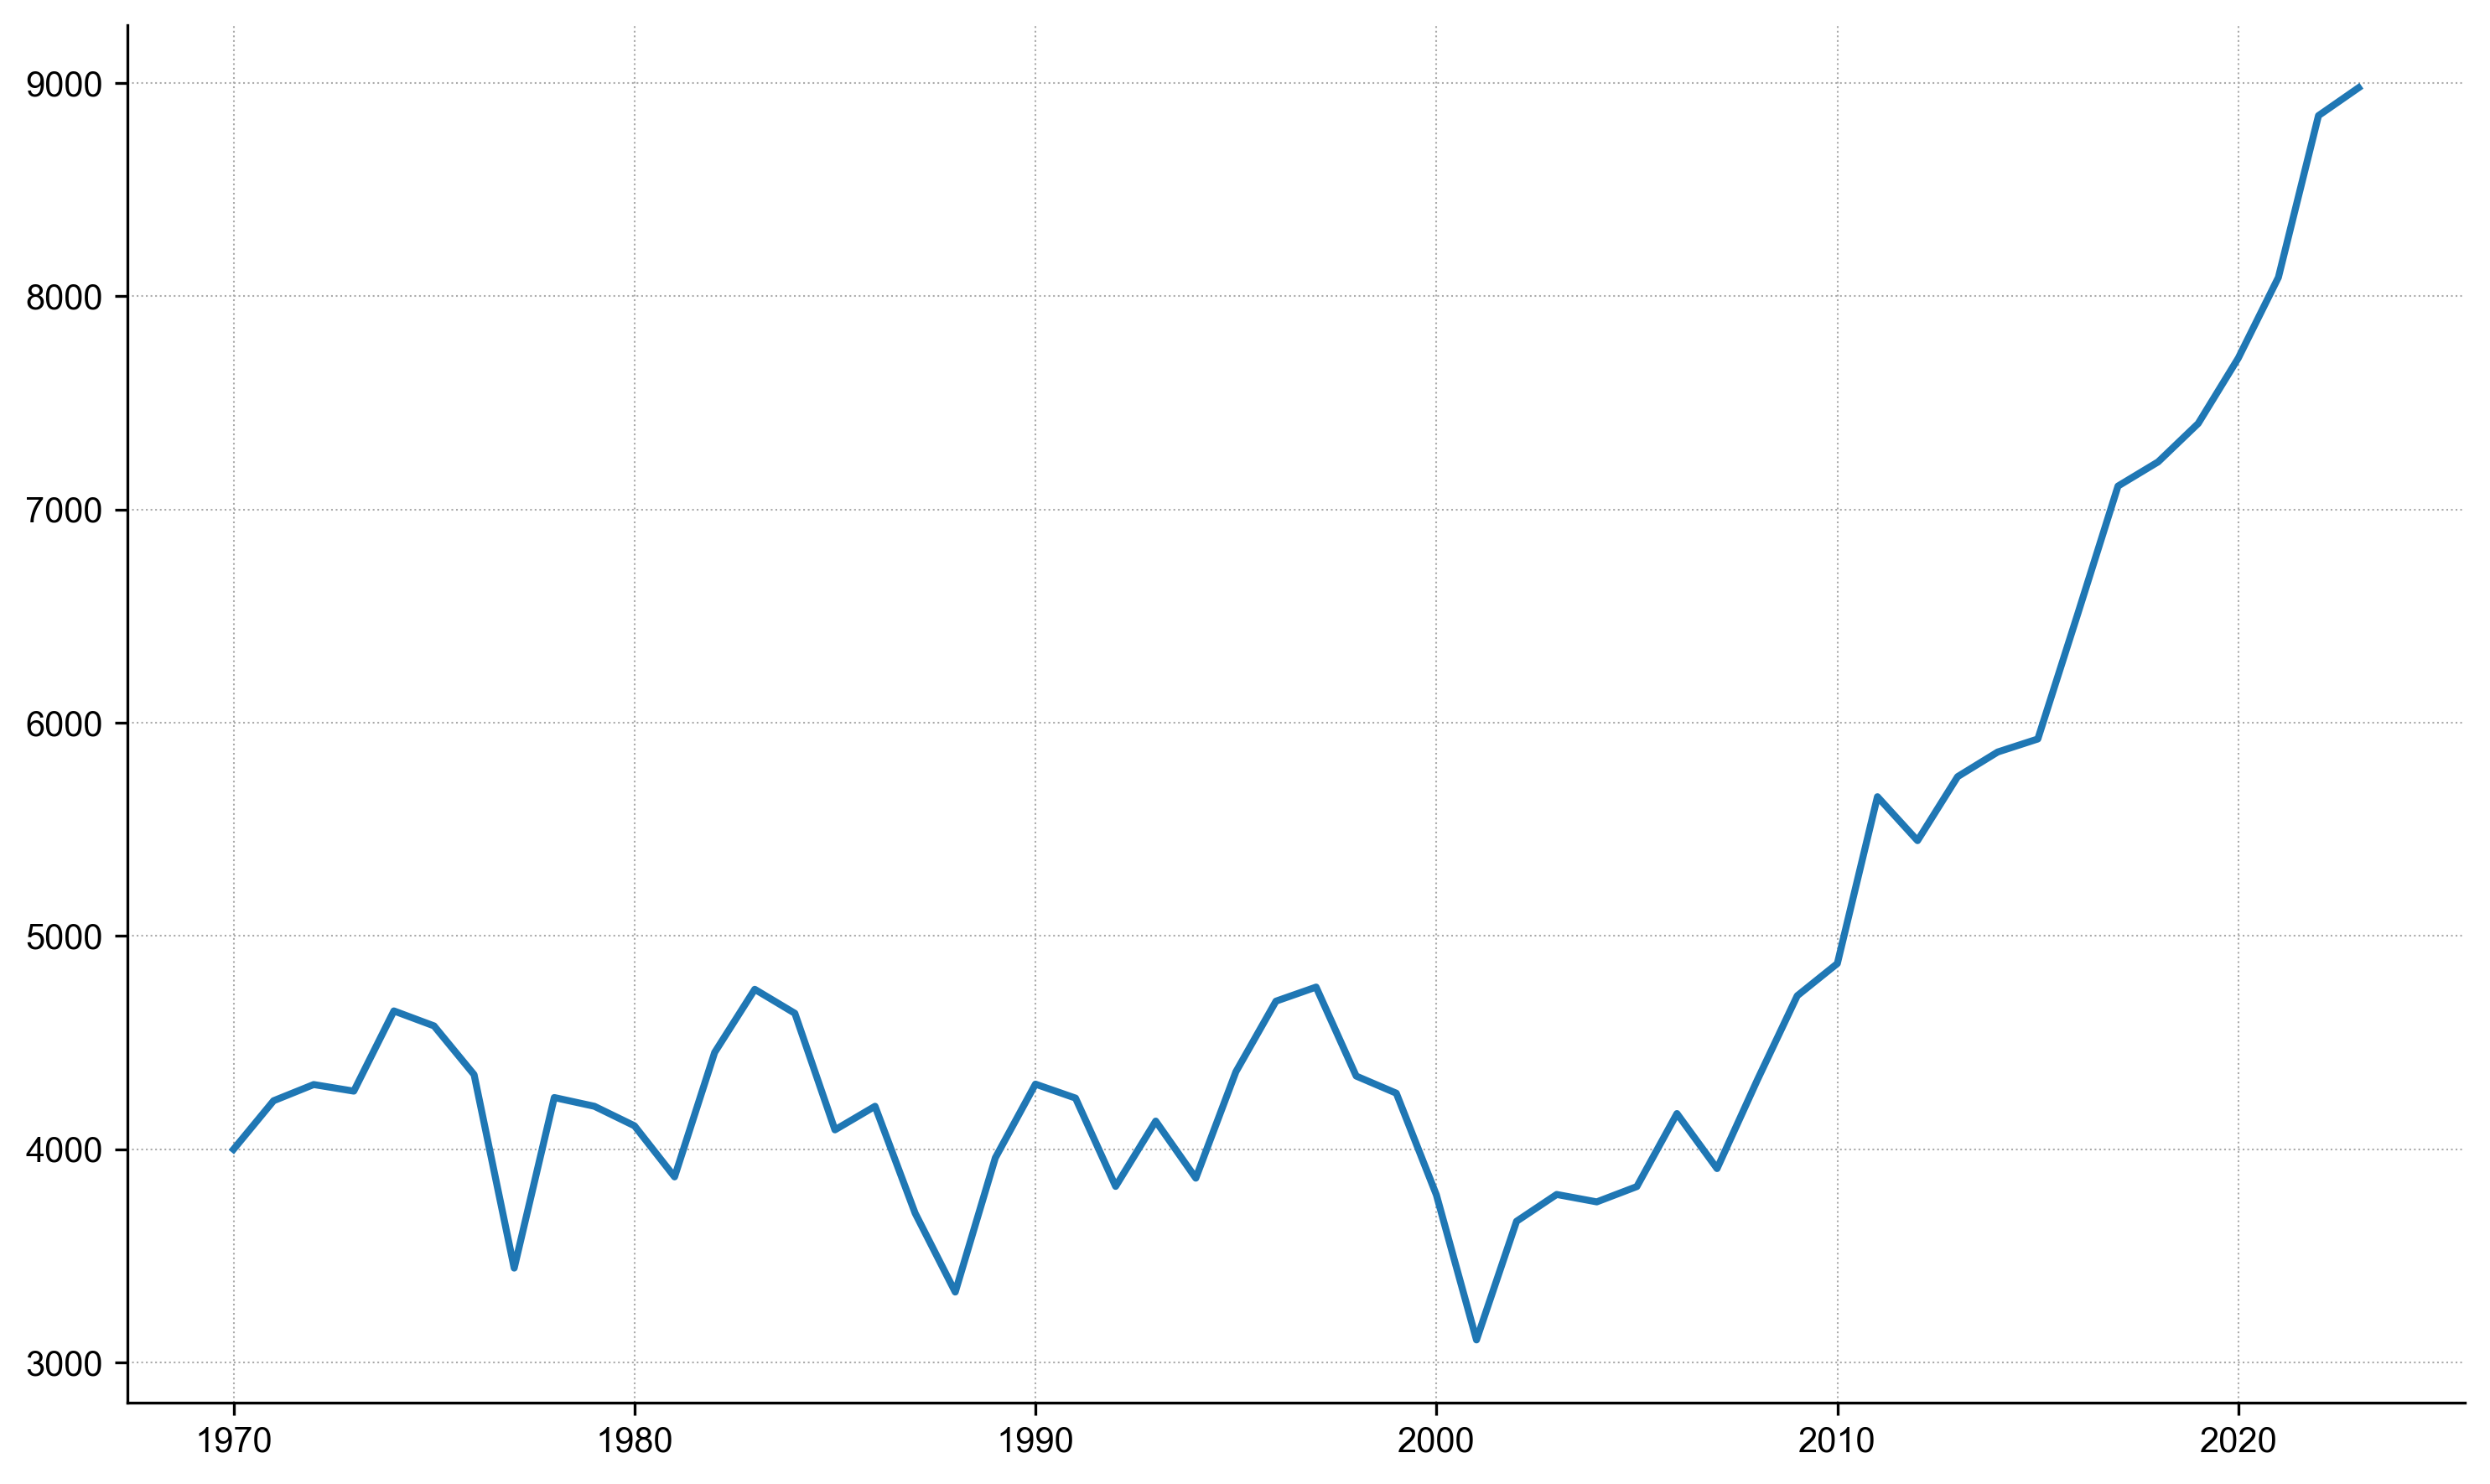

In [58]:
plt.figure(figsize=(10, 6))

plt.plot(
    us_df["year"],
    us_df["fossil_energy_per_capita"],
    # us_df["renewables_energy_per_capita"],
    # label="Total Energy Demand",
    # color="blue",
    linewidth=2,
)

plt.show()

plt.figure(figsize=(10, 6))

plt.plot(
    us_df["year"],
    # us_df["fossil_energy_per_capita"],
    us_df["renewables_energy_per_capita"],
    # label="Total Energy Demand",
    # color="blue",
    linewidth=2,
)

plt.show()